In [1]:
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
import os

data_path = os.path.abspath(os.path.join(os.getcwd(), '../../data'))
sys.path.append(data_path)

In [ ]:
from data import sample, evaluation
bart = evaluation.copy()

In [4]:
political_labels = ["Liberal", "Conservative", "Neutral"]
political_labels_n = ["Liberal", "Conservative"]

In [5]:
pipe = pipeline(model="facebook/bart-large-mnli")

def classify_sentence(sentence):
    result = pipe(sentence, candidate_labels=political_labels_n)
    top_label = result["labels"][0]
    return top_label

bart["predicted_label"] = bart["sentence"].apply(classify_sentence)

label_counts = bart["predicted_label"].value_counts()


# result = pipe(bart.loc[0, "sentence"], candidate_labels=political_labels)
# top_label = result["labels"][0]
# print(bart.iloc[0], top_label)

/opt/miniconda3/envs/cs375/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [6]:
pipe2 = pipeline(model="facebook/bart-large-mnli")
bart2 = evaluation.copy()

def classify_sentence(sentence):
    result = pipe2(sentence, candidate_labels=political_labels)
    top_label = result["labels"][0]
    return top_label

bart2["predicted_label"] = bart2["sentence"].apply(classify_sentence)

label_counts2 = bart2["predicted_label"].value_counts()


# result = pipe(bart.loc[0, "sentence"], candidate_labels=political_labels)
# top_label = result["labels"][0]
# print(bart.iloc[0], top_label)

/opt/miniconda3/envs/cs375/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [7]:
label_counts

predicted_label
Liberal         556
Conservative    194
Name: count, dtype: int64

In [8]:
label_counts2

predicted_label
Liberal         461
Conservative    164
Neutral         125
Name: count, dtype: int64

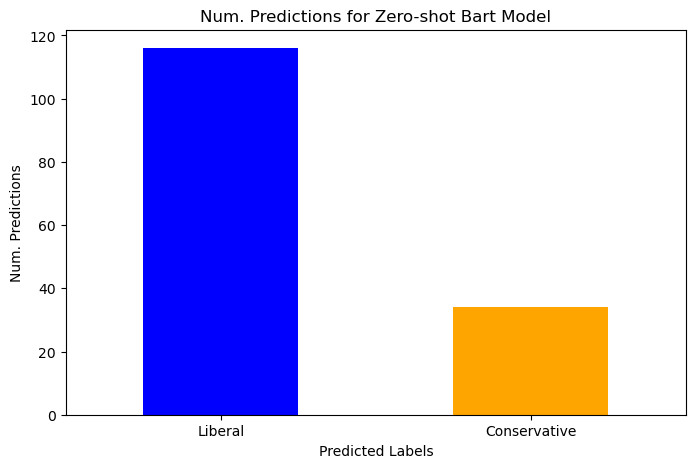

In [8]:
label_counts.plot(kind="bar", color=["blue", "orange"], figsize=(8, 5))
plt.title("Num. Predictions for Zero-shot Bart Model")
plt.xlabel("Predicted Labels")
plt.ylabel("Num. Predictions")
plt.xticks(rotation=0)
plt.show()

In [20]:
correct_nn = bart[bart['label'] == bart['predicted_label']]
correct_by_class_nn = correct_nn.label.value_counts()
correct_by_class_nn

label
Liberal         273
Conservative     92
Name: count, dtype: int64

In [21]:
correct = bart2[bart2['label'] == bart2['predicted_label']]
correct_by_class = correct.label.value_counts()
correct_by_class

label
Liberal         230
Conservative     75
Name: count, dtype: int64

In [24]:
plot_data = {
    "3 Labels" : correct_by_class,
    "2 Labels" : correct_by_class_nn
}

AttributeError: 'dict' object has no attribute 'plot'